## Indian Metro Traffic Prediction

In [316]:
# import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
# lets import all the sklearn classes which we will use in this project
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score

## Import Dataset

In [318]:
# lets import the train dataset
metro= pd.read_csv('Train.csv')
metro.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [319]:
# lets see the information about the columns in training data
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           43 non-null     object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

In [320]:
# lets see the some statistics of the dataset
metro.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [321]:
# lets drop the is_holiday column because it has lots of null values comparing to non-null values
metro.drop(columns=['is_holiday'], inplace=True)

## Data Cleaning

In [322]:
# lets convert the date_time column form object datatype to date time datatype
metro['date_time'] = pd.to_datetime(metro['date_time'])
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            33750 non-null  datetime64[ns]
 1   air_pollution_index  33750 non-null  int64         
 2   humidity             33750 non-null  int64         
 3   wind_speed           33750 non-null  int64         
 4   wind_direction       33750 non-null  int64         
 5   visibility_in_miles  33750 non-null  int64         
 6   dew_point            33750 non-null  int64         
 7   temperature          33750 non-null  float64       
 8   rain_p_h             33750 non-null  float64       
 9   snow_p_h             33750 non-null  float64       
 10  clouds_all           33750 non-null  int64         
 11  weather_type         33750 non-null  object        
 12  weather_description  33750 non-null  object        
 13  traffic_volume       33750 non-

In [323]:
# lets extract the month, day of week and time from the date_time column
metro['month'] = metro['date_time'].dt.month
metro['day_of_week'] = metro['date_time'].dt.day
metro['timing'] = metro['date_time'].dt.hour

# lets drop the column date_time
metro.drop(columns=['date_time'], inplace=True)

In [324]:
#lets see the 5 samples
metro.sample(5)

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,month,day_of_week,timing
23079,173,60,3,278,8,8,302.98,0.0,0.0,20,Clouds,few clouds,5241,5,6,13
31486,107,45,1,156,7,7,278.59,0.0,0.0,1,Clear,sky is clear,4643,3,4,15
26073,166,43,2,10,8,8,291.46,0.0,0.0,90,Mist,mist,4224,8,27,14
30755,281,38,1,260,1,1,266.48,0.0,0.0,90,Clouds,overcast clouds,1222,2,4,7
19162,99,80,6,313,6,6,285.36,0.0,0.0,1,Clear,sky is clear,4781,10,27,13


In [325]:
# lets see value counts of weather_type 
metro['weather_type'].value_counts()

weather_type
Clouds          11213
Clear            9233
Mist             4047
Rain             3940
Snow             2070
Drizzle          1204
Haze              902
Fog               567
Thunderstorm      553
Smoke              17
Squall              4
Name: count, dtype: int64

In [326]:
# lets combine both weather type and weather description into one column
metro['weather'] = metro['weather_type'].str.split() + metro['weather_description'].str.split()
            
metro['weather'] = metro['weather'].apply(lambda x: "".join(set([i.lower() for i in x])))

# lets drop the weather_type and weather_description columns
metro.drop(columns=['weather_type', 'weather_description'], inplace=True)
metro.sample(5)

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,month,day_of_week,timing,weather
16633,168,95,2,244,2,2,291.18,0.00,0.0,1,2735,7,17,5,mist
29570,192,92,2,170,4,4,275.08,0.00,0.0,40,6164,12,28,16,scatteredclouds
11187,112,94,0,169,4,4,263.57,0.00,0.0,64,5008,1,3,13,snowlight
24419,60,65,4,140,4,4,289.09,0.00,0.0,20,6208,6,24,7,fog
16811,21,78,3,294,5,5,294.07,2.16,0.0,40,847,7,24,4,thunderstormwithdrizzleproximity


In [327]:
# lets find out if the columns visibility_in miles and dew_point are same or not
metro[metro['visibility_in_miles'] == metro['dew_point']].shape

(33750, 15)

In [328]:
# as both the columns are same, lets keep only one out of them
metro.drop(columns=['visibility_in_miles'], inplace=True)

# lets see random 5 samples
metro.sample(5)

,air_pollution_index,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,month,day_of_week,timing,weather
21406,77,53,4,175,4,277.22,0.0,0.0,40,5164,2,20,15,scatteredclouds
18950,111,87,3,298,3,286.99,0.0,0.0,1,2651,10,12,5,skyisclear
7925,58,58,4,293,4,291.72,0.0,0.0,0,5104,7,25,11,skyisclear
20247,193,86,6,219,9,264.94,0.0,0.0,1,4661,12,27,16,skyisclear
19440,12,87,3,164,3,280.01,0.0,0.0,90,872,11,12,4,rainmoderate


In [329]:
# lets do some statistics
metro.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,month,day_of_week,timing
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163,6.407674,15.646874,11.404385
std,83.735515,16.852248,2.055792,99.841088,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289,3.543241,8.700568,6.951078
min,10.000000,13.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000,3.000000,8.000000,5.000000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000,6.000000,16.000000,11.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000,10.000000,23.000000,17.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000,12.000000,31.000000,23.000000


## EDA

In [330]:
metro.drop(columns=['weather']).corr()

,air_pollution_index,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,month,day_of_week,timing
air_pollution_index,1.000000,-0.000277,-0.004166,0.000749,0.003499,0.005368,0.000443,0.007227,-0.008541,-0.003751,0.007733,0.010109,0.000424
humidity,-0.000277,1.000000,-0.147042,-0.046268,0.005510,0.033273,-0.012161,0.016625,0.014520,0.016455,0.169736,0.064877,0.001066
wind_speed,-0.004166,-0.147042,1.000000,0.191320,-0.005160,-0.052856,0.001165,-0.006534,-0.004456,0.016329,-0.094180,0.008752,0.010049
wind_direction,0.000749,-0.046268,0.191320,1.000000,0.000716,-0.045843,0.002230,0.000321,0.020392,0.014278,0.060718,-0.012861,0.005098
dew_point,0.003499,0.005510,-0.005160,0.000716,1.000000,0.000760,-0.008301,0.001453,-0.001582,0.001348,-0.001428,-0.001430,0.000721
temperature,0.005368,0.033273,-0.052856,-0.045843,0.000760,1.000000,0.011071,-0.020721,-0.121334,0.127871,0.208700,0.016141,0.112298
rain_p_h,0.000443,-0.012161,0.001165,0.002230,-0.008301,0.011071,1.000000,-0.000159,0.005206,0.005642,0.001405,-0.002863,0.004013
snow_p_h,0.007227,0.016625,-0.006534,0.000321,0.001453,-0.020721,-0.000159,1.000000,0.032591,0.001197,0.024317,0.019260,0.011725
clouds_all,-0.008541,0.014520,-0.004456,0.020392,-0.001582,-0.121334,0.005206,0.032591,1.000000,0.037922,-0.028913,0.062878,0.021735
traffic_volume,-0.003751,0.016455,0.016329,0.014278,0.001348,0.127871,0.005642,0.001197,0.037922,1.000000,-0.015371,-0.018919,0.348867


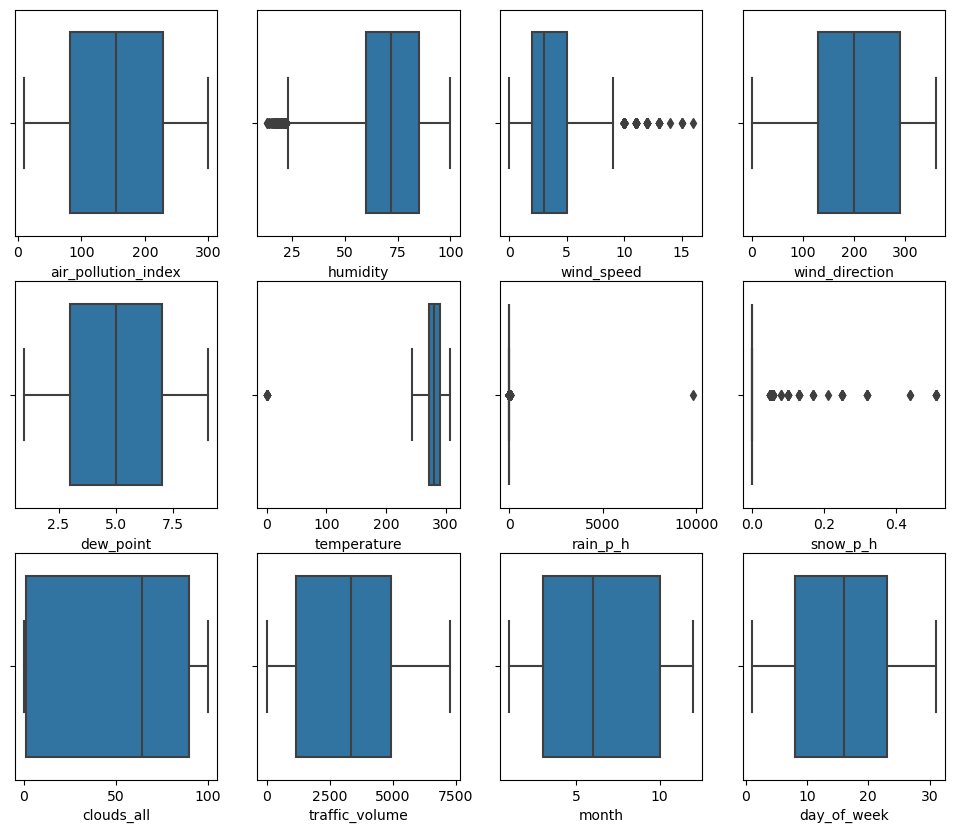

In [331]:
# box plots of different columns 
plt.subplots(nrows=3, ncols=4, figsize=(12, 10))

for i in range(12):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x = metro.columns[i], data = metro)

plt.show()

## Data Transform Pipeline

In [332]:
# lets split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(metro.drop(columns=['traffic_volume']), metro['traffic_volume'], test_size=0.2, random_state=70)

# lets encode the weather column
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# lets transform only weather column
trf1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), ['weather'])], remainder='passthrough')

# lets transform all the columns
trf2 = ColumnTransformer(transformers=[('scaler1', StandardScaler(), ['air_pollution_index', 'temperature']),
                                      ('scaler2', RobustScaler(), ['humidity', 'rain_p_h']),
                                      ('scaler3', MinMaxScaler(), ['wind_direction']),
                                      ('encoder', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), ['weather'])], remainder = 'passthrough')

## Pipelines

In [333]:
# models to train without the transformed data
models_without_td = {
    'pipe1' : Pipeline([('trf1', trf1),('dt', DecisionTreeRegressor())]),
    'pipe2' : Pipeline([('trf1', trf1),('hgb', HistGradientBoostingRegressor())]),
    'pipe3' : Pipeline([('trf1', trf1),('gb', GradientBoostingRegressor())]),
    'pipe4' : Pipeline([('trf1', trf1),('rf', RandomForestRegressor())]),
    'pipe5' : Pipeline([('trf1', trf1),('et', ExtraTreesRegressor())]),
    'pipe6' : Pipeline([('trf1', trf1),('lin', LinearRegression())]),
    'pipe7' : Pipeline([('trf1', trf1),('sgd', SGDRegressor())]),
    'pipe8' : Pipeline([('trf1', trf1),('svm', SVR())]),
    'pipe9' : Pipeline([('trf1', trf1),('ridge', Ridge())]),
    'pipe10' : Pipeline([('trf1', trf1),('lasso', Lasso())]),
    'pipe11' : Pipeline([('trf1', trf1),('knn', KNeighborsRegressor())])
}

# models to train with transformed data
models_with_td = {
    'pipe1' : Pipeline([('trf2', trf2),('dt', DecisionTreeRegressor())]),
    'pipe2' : Pipeline([('trf2', trf2),('hgb', HistGradientBoostingRegressor())]),
    'pipe3' : Pipeline([('trf2', trf2),('gb', GradientBoostingRegressor())]),
    'pipe4' : Pipeline([('trf2', trf2),('rf', RandomForestRegressor())]),
    'pipe5' : Pipeline([('trf2', trf2),('et', ExtraTreesRegressor())]),
    'pipe6' : Pipeline([('trf2', trf2),('lin', LinearRegression())]),
    'pipe7' : Pipeline([('trf2', trf2),('sgd', SGDRegressor())]),
    'pipe8' : Pipeline([('trf2', trf2),('svm', SVR())]),
    'pipe9' : Pipeline([('trf2', trf2),('ridge', Ridge())]),
    'pipe10' : Pipeline([('trf2', trf2),('lasso', Lasso())]),
    'pipe11' : Pipeline([('trf2', trf2),('knn', KNeighborsRegressor())])
}

## Training and Evaluating without transformed Data

In [334]:
# lets train the models 
scores = {}
for i, model_name in enumerate(models_without_td.keys()):
    model = models_without_td[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[list(models_without_td[model_name].named_steps.keys())[1]] = round(r2_score(y_test, y_pred), 2)

scores

{'dt': 0.63,
 'hgb': 0.82,
 'gb': 0.78,
 'rf': 0.81,
 'et': 0.79,
 'lin': 0.14,
 'sgd': -1.3560534356736496e+21,
 'svm': 0.0,
 'ridge': 0.14,
 'lasso': 0.14,
 'knn': 0.09}

In [372]:
# lets create a dataframe for storing scores
score_df = pd.DataFrame(columns=['scores_wo_td'])
score_df['scores_wo_td'] = scores
score_df[score_df['scores_wo_td'] < 0] = 0

In [373]:
# lets check the scores of the df
score_df

,scores_wo_td
dt,0.63
hgb,0.82
gb,0.78
rf,0.81
et,0.79
lin,0.14
sgd,0.00
svm,0.00
ridge,0.14
lasso,0.14


## Training and Evaluating with transformed Data

In [378]:
# lets train the models 
scores2 = {}
for i, model_name in enumerate(models_with_td.keys()):
    model = models_with_td[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores2[list(models_with_td[model_name].named_steps.keys())[1]] = round(r2_score(y_test, y_pred), 2)

scores2

{'dt': 0.62,
 'hgb': 0.82,
 'gb': 0.78,
 'rf': 0.82,
 'et': 0.79,
 'lin': 0.14,
 'sgd': -1.4246386580879264e+17,
 'svm': 0.02,
 'ridge': 0.14,
 'lasso': 0.14,
 'knn': 0.73}

In [379]:
score_df['scores_with_td'] = scores2
score_df[score_df['scores_with_td'] < 0] = 0

In [380]:
score_df

,scores_wo_td,scores_with_td
dt,0.63,0.62
hgb,0.82,0.82
gb,0.78,0.78
rf,0.81,0.82
et,0.79,0.79
lin,0.14,0.14
sgd,0.00,0.00
svm,0.00,0.02
ridge,0.14,0.14
lasso,0.14,0.14
